In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# read speed dating dataset
data = pd.read_csv("Speed Dating Data.csv", encoding = "ISO-8859-1")
data.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [4]:
data.shape

(8378, 195)

In [5]:
data.columns

Index(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position',
       'positin1', 'order',
       ...
       'attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3', 'attr5_3',
       'sinc5_3', 'intel5_3', 'fun5_3', 'amb5_3'],
      dtype='object', length=195)

In [6]:
data['id'].unique

<bound method Series.unique of 0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
8373    22.0
8374    22.0
8375    22.0
8376    22.0
8377     NaN
Name: id, Length: 8378, dtype: float64>

In [7]:
data.describe()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,...,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,...,7.240312,8.093357,8.388777,7.658782,7.391545,6.810020,7.615079,7.932540,7.155258,7.048611
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.650199,5.477009,...,1.576596,1.610309,1.459094,1.744670,1.961417,1.507341,1.504551,1.340868,1.672787,1.717988
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000
25%,154.000000,4.000000,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.000000,...,7.000000,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000
50%,281.000000,8.000000,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.000000,...,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000
75%,407.000000,13.000000,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.000000,...,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000
max,552.000000,22.000000,1.000000,44.000000,2.000000,21.000000,22.000000,22.000000,22.000000,22.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [8]:
data.isnull().sum()

iid            0
id             1
gender         0
idg            0
condtn         0
            ... 
attr5_3     6362
sinc5_3     6362
intel5_3    6362
fun5_3      6362
amb5_3      6362
Length: 195, dtype: int64

In [9]:
# 29 colonnes ont 79 champs manquants.
# Seules 13 colonnes ont 0 champs manquants.

data.isnull().sum().value_counts()

79      29
4404    14
0       13
6362    12
915     12
        ..
104      1
107      1
1        1
1911     1
360      1
Length: 64, dtype: int64

In [10]:
# Lister les 13 colonnes complètes (i.e. 0 cps manquants)
# match		1=yes, 0=no
# gender:	Female=0 	Male=1
# iid: 	unique subject number, group(wave id gender)

# id:  	subject number within wave
# condtn: 	1=limited choice 	2=extensive choice

# ser[ser == 36] # ser: Une séries pandas. Pas de préciser la colonne car il n'y a qu'une. 
data.isnull().sum()[data.isnull().sum() == 0]

iid         0
gender      0
idg         0
condtn      0
wave        0
round       0
position    0
order       0
partner     0
match       0
samerace    0
dec_o       0
dec         0
dtype: int64

In [11]:
# Construction par étape (filtre + opération.)
# filtre simple
# data['age'] > 25

# filtre double
# (data['age'] > 25) & (data['age'] < 35)

# Selection sur le filtre
# data[(data['age'] > 25) & (data['age'] < 35)]
# La sortie de cette opération est un dataframe. On peut donc appliquer toutes les opérations liées au dataframes.

data[(data['age'] > 25) & (data['age'] < 35)]['age'].mean()

28.417391304347827

In [12]:
# hommes 1, femmes 0 (cf document word.)
data[(data['age'] > 25) & (data['age'] < 35)]['gender'].mean() # 55% hommes.

0.5527313266443701

In [13]:
# hommes 1, femmes 0 (cf document word.)
data[(data['age'] > 25) & (data['age'] < 35)][['gender','race']].mean() # 55% hommes.

gender    0.552731
race      2.676700
dtype: float64

In [14]:
data[(data['age'] > 25) & (data['age'] < 35)].groupby('race')['age'].mean() # Moyenne d'age pour race. (En prenant en compte uniquement les gens entre 25 et 35 ans bornes exclus)

race
1.0    28.522556
2.0    28.542023
3.0    28.305747
4.0    27.951759
6.0    29.164384
Name: age, dtype: float64

In [15]:
data[(data['age'] > 25) & (data['age'] < 35)]['race'].value_counts(normalize = True)

2.0    0.573021
4.0    0.221851
3.0    0.096990
1.0    0.059309
6.0    0.048829
Name: race, dtype: float64

<AxesSubplot:ylabel='race'>

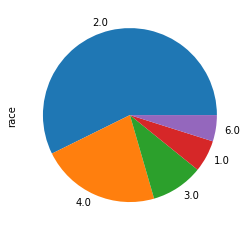

In [16]:
data[(data['age'] > 25) & (data['age'] < 35)]['race'].value_counts(normalize = True).plot.pie()

C:\Users\phili\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1583: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


<AxesSubplot:ylabel='race'>

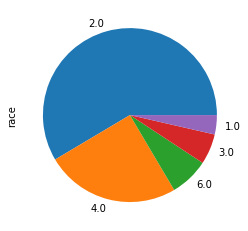

In [17]:
data[(data['age'] > 15) & (data['age'] < 25)]['race'].value_counts(normalize = True).plot.pie()

(20, 30)


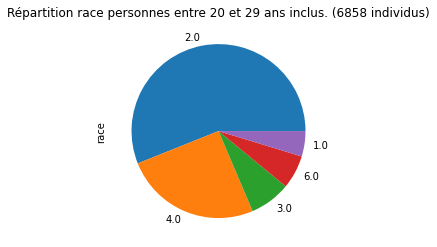

(30, 40)


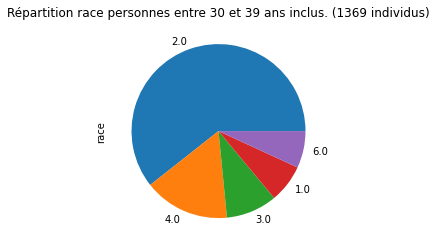

(40, 50)


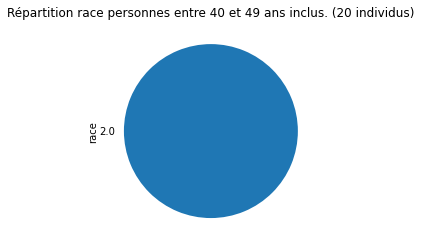

(50, 99)


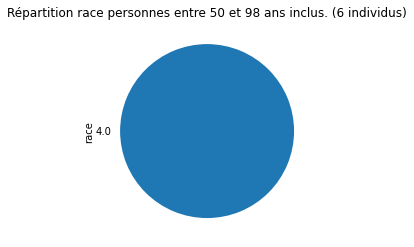

In [18]:
list_bornes_ages = [(20,30), (30,40),(40,50),(50,99)]
for borne in list_bornes_ages:
    print(borne)
    age_min = borne[0]
    age_max = borne[1]
    data[(data['age'] >= age_min) & (data['age'] < age_max)]['race'].value_counts(normalize = True).plot.pie()
    plt.title("Répartition race personnes entre {} et {} ans inclus. ({} individus)".format(
        age_min,
        age_max -1,
        data[(data['age'] >= age_min) & (data['age'] < age_max)]['race'].count()))
    plt.show()
    

In [19]:
data.dtypes

iid           int64
id          float64
gender        int64
idg           int64
condtn        int64
             ...   
attr5_3     float64
sinc5_3     float64
intel5_3    float64
fun5_3      float64
amb5_3      float64
Length: 195, dtype: object

In [20]:
data.gender.value_counts()
data["gender_str"] = np.where(dataset["gender"]==1,"Male","Female")
data["gender_str"].value_counts()

NameError: name 'dataset' is not defined

In [21]:
data.isna().sum()

iid            0
id             1
gender         0
idg            0
condtn         0
            ... 
attr5_3     6362
sinc5_3     6362
intel5_3    6362
fun5_3      6362
amb5_3      6362
Length: 195, dtype: int64

In [28]:
# most common age of participants
data["age"].value_counts()

27.0    1059
23.0     894
26.0     869
24.0     863
25.0     837
28.0     746
22.0     655
29.0     589
30.0     574
21.0     291
32.0     210
33.0     161
34.0     152
31.0     125
35.0      60
20.0      55
36.0      45
42.0      20
19.0      20
38.0      19
39.0      18
18.0      10
55.0       6
37.0       5
Name: age, dtype: int64

In [30]:
data["age"].unique

<bound method Series.unique of 0       21.0
1       21.0
2       21.0
3       21.0
4       21.0
        ... 
8373    25.0
8374    25.0
8375    25.0
8376    25.0
8377    25.0
Name: age, Length: 8378, dtype: float64>

In [31]:
round(data["age"].mean(),1)

26.4

In [33]:
data["age"] = data["age"].fillna(round(data["age"].mean(),1))
data["age"] = data["age"].astype(int)

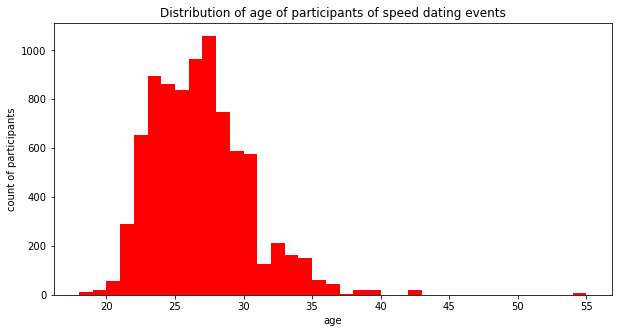

In [34]:
# distribution of age groups
bins = np.arange(data.age.min(),data.age.max()+1, 1)
plt.figure(figsize=(10, 5))
plt.hist(data=data, x="age", bins = bins, facecolor = 'r')
plt.title("Distribution of age of participants of speed dating events")
plt.xlabel("age")
plt.ylabel("count of participants")
plt.show()

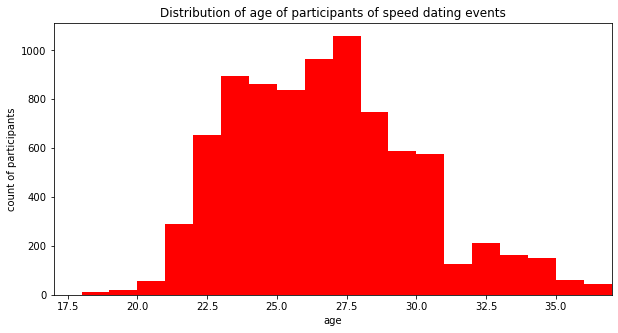

In [36]:
# zooming on age of majority of participants
bins = np.arange(data.age.min(),data.age.max()+0.5, 1)
plt.figure(figsize=(10, 5))
plt.hist(data=data, x="age", bins = bins, facecolor = 'r')
plt.title("Distribution of age of participants of speed dating events")
plt.xlabel("age")
plt.xlim(17, 37)
plt.ylabel("count of participants")
plt.show()

In [37]:
data['goal'].value_counts()

1.0    3426
2.0    3012
3.0     631
5.0     510
6.0     419
4.0     301
Name: goal, dtype: int64

In [38]:
num_goal = [1,2,3,4,5,6]
goal_name = ['fun night out', 'meet new people','get a date','looking for serious relationship','to say I dit it','other goal']
for i in range(len(num_goal)):
    data.loc[data['goal'] == num_goal[i], 'goal'] = goal_name[i]


In [39]:
data['goal'].value_counts()

fun night out                       3426
meet new people                     3012
get a date                           631
to say I dit it                      510
other goal                           419
looking for serious relationship     301
Name: goal, dtype: int64

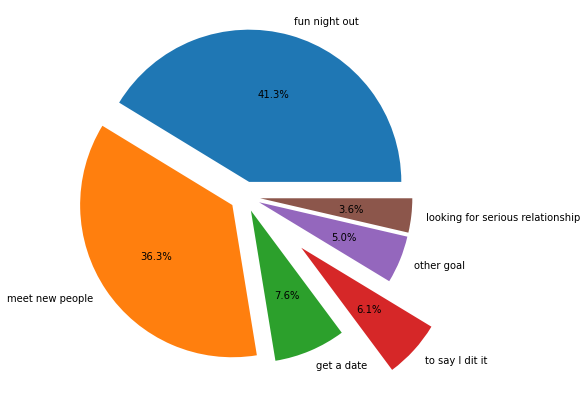

In [40]:
ct = data['goal'].value_counts()
labels = ct.index
y = ct.values
plt.figure(figsize= (9,7))
plt.pie(y, labels = labels, autopct = '%1.1f%%', explode= (0.1,0.1,0.1,0.5,0.1,0.1))
plt.show()

In [41]:
sorted(ct, reverse=True)

[3426, 3012, 631, 510, 419, 301]

In [42]:
ct.sort_values(ascending=False )

fun night out                       3426
meet new people                     3012
get a date                           631
to say I dit it                      510
other goal                           419
looking for serious relationship     301
Name: goal, dtype: int64

<AxesSubplot:xlabel='goal', ylabel='count'>

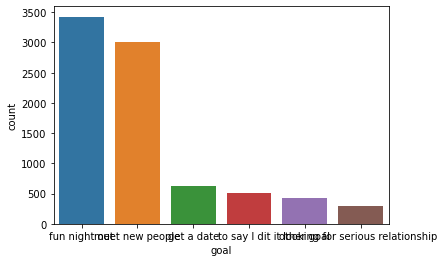

In [44]:
sns.countplot(data = data, x='goal', order = data['goal'].value_counts().index)

In [45]:
#for col in data.select_dtypes('float'):
    #plt.figure()
    #sns.distplot(data[col])

C:\Users\phili\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

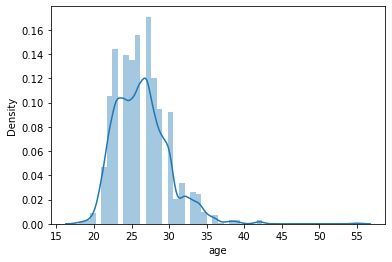

In [46]:
sns.distplot(data['age'])

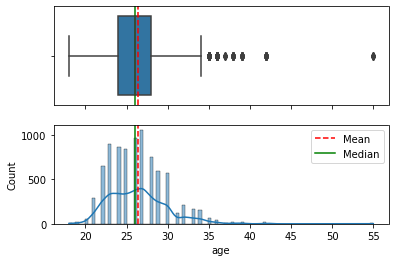

In [47]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns



f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
mean=data["age"].mean()
median=data["age"].median()


sns.boxplot(data=data, x="age", ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')


sns.histplot(data=data, x="age", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")


ax_hist.legend()

ax_box.set(xlabel='')
plt.show()

In [48]:
data['age'].value_counts()

27    1059
26     964
23     894
24     863
25     837
28     746
22     655
29     589
30     574
21     291
32     210
33     161
34     152
31     125
35      60
20      55
36      45
42      20
19      20
38      19
39      18
18      10
55       6
37       5
Name: age, dtype: int64

In [49]:
data.loc[data['age']>50,"age"]

6822    55
6823    55
6824    55
6825    55
6826    55
6827    55
Name: age, dtype: int32

In [50]:
len(data.loc[data['age']>40,"age"])

26

In [51]:
df2 = data.loc[(data['age']>=40)&(data['age']<=55)]

C:\Users\phili\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

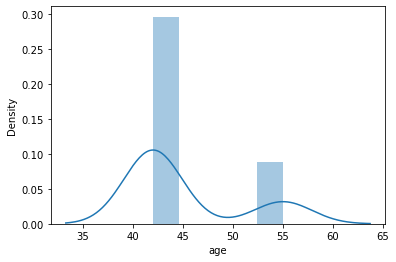

In [52]:
sns.distplot(df2['age']) #26 pers

In [53]:
round(data["age"].mean(),1)

26.4

In [54]:
data["age"].mode()

0    27
dtype: int32

In [55]:
data['date'].value_counts()

6.0    2094
4.0    2040
5.0    1528
7.0    1434
3.0     783
2.0     308
1.0      94
Name: date, dtype: int64

<AxesSubplot:xlabel='date', ylabel='age'>

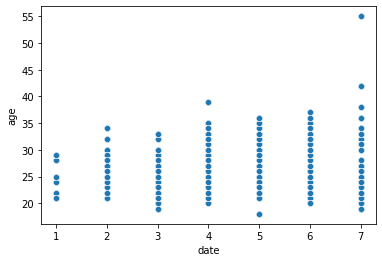

In [56]:
sns.scatterplot(data=data, x="date", y="age")

In [57]:
data.head()[['age','date']]

,age,date
0,21,7.0
1,21,7.0
2,21,7.0
3,21,7.0
4,21,7.0


In [58]:
data.head()[['age','date']].isnull().sum()

age     0
date    0
dtype: int64

In [59]:
nb_people_ligneAge_colDate = np.zeros((100, 8), dtype = int) # Initialisation: Matrice avec que des 0.

for ind, fields in data.iterrows(): # On parcourt le dataframe ligne par ligne.
    age = fields['age']
    date = fields['date']
    try:
        age_int = int(age)
        date_int = int(date)
    except ValueError:
        pass
    else:
        # Ajouter 1 à la cellule (de la matrice) de ligne = age et de colonne = date.
        nb_people_ligneAge_colDate[age_int,date_int] += 1 


In [60]:
nb_people_ligneAge_colDate[25,3] # Donner le nb de personnes qui ont 25 ans et date = 3. 

94

In [61]:
nb_people_ligneAge_colDate[34, 2] # Donner le nb de personnes qui ont 34 ans et date = 2.

9

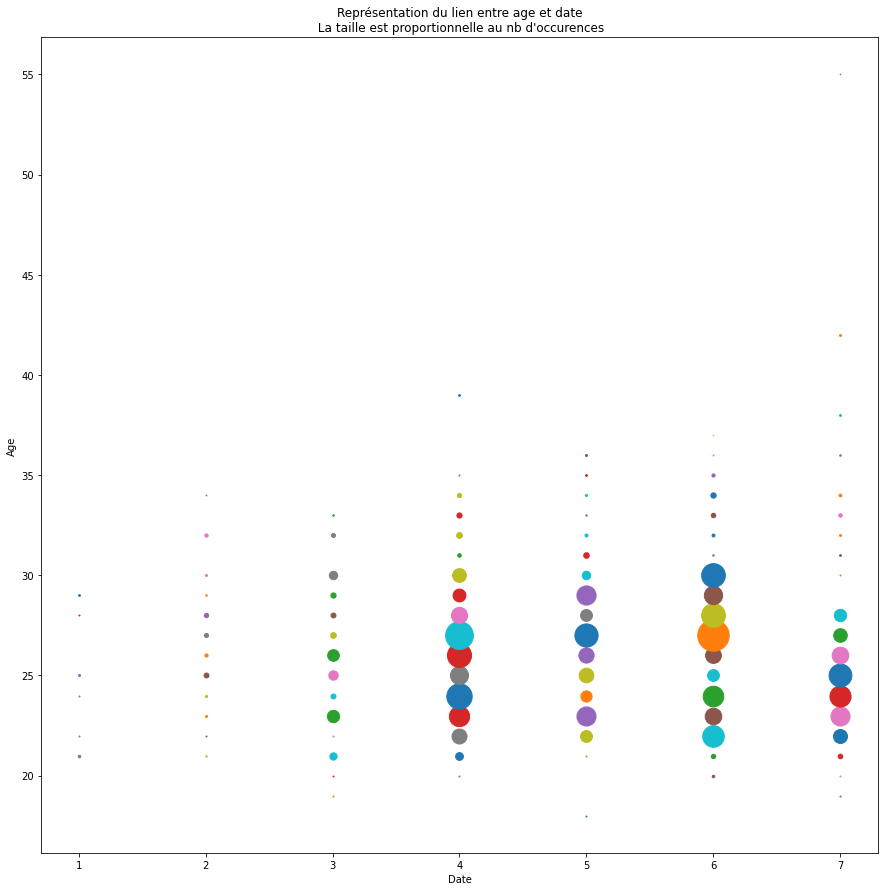

In [62]:
# Version avec taille proportionnelle au nombre d'occurences
plt.figure(figsize = (15,15))
for i in range(len(nb_people_ligneAge_colDate)):
    for j in range(len(nb_people_ligneAge_colDate[0])):
        item = nb_people_ligneAge_colDate[i,j]
        #print(item)
        if item != 0:
            plt.plot([j],[i], marker="o",  markersize=item/10)
            
plt.xlabel('Date')
plt.ylabel('Age')
plt.title("Représentation du lien entre age et date\n La taille est proportionnelle au nb d'occurences")
plt.show()

<AxesSubplot:xlabel='race', ylabel='age'>

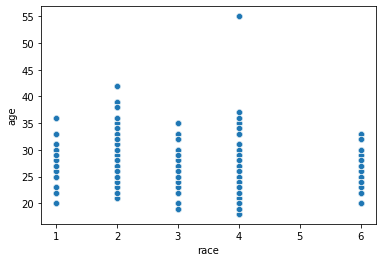

In [63]:
sns.scatterplot(data=data, x="race", y="age")

<AxesSubplot:xlabel='date', ylabel='goal'>

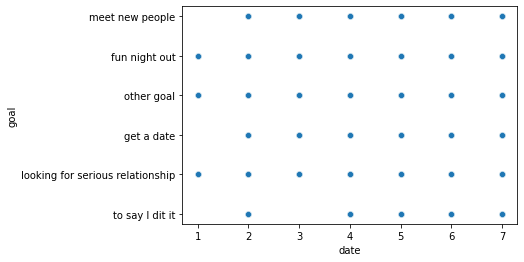

In [64]:
sns.scatterplot(data=data, x="date", y="goal")

<ipython-input-65-b2240a58f815>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


<AxesSubplot:>

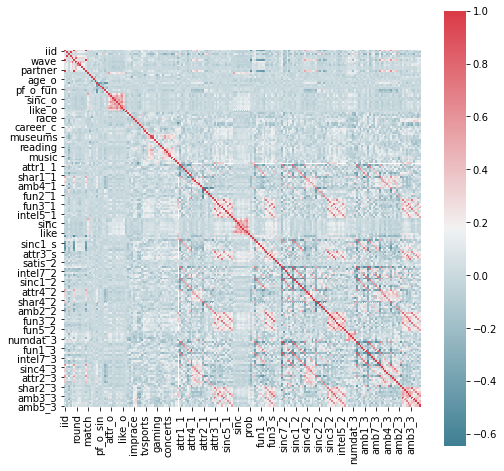

In [65]:
f, ax = plt.subplots(figsize=(8, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

C:\Users\phili\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='date', ylabel='Density'>

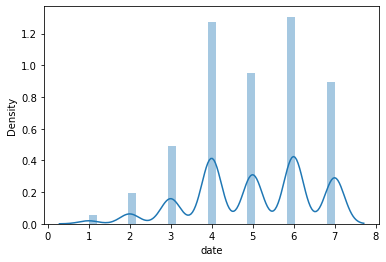

In [66]:
sns.distplot(data['date'])

In [67]:
data['income']

0       69,487.00
1       69,487.00
2       69,487.00
3       69,487.00
4       69,487.00
          ...    
8373          NaN
8374          NaN
8375          NaN
8376          NaN
8377          NaN
Name: income, Length: 8378, dtype: object

In [68]:
data['income'].map(type)

0         <class 'str'>
1         <class 'str'>
2         <class 'str'>
3         <class 'str'>
4         <class 'str'>
             ...       
8373    <class 'float'>
8374    <class 'float'>
8375    <class 'float'>
8376    <class 'float'>
8377    <class 'float'>
Name: income, Length: 8378, dtype: object

In [69]:
def clean_income(x):
    if type(x) is float and np.isnan(x):
        return(x)
    else:
        res = x.replace((".00"), (""))
        res = res.replace((","), (""))
        res = int(res)
        return(res)

In [62]:
clean_income("69,487.00") #test

69487

In [63]:
data['income_2'] = data['income'].map(lambda x: clean_income(x))

In [64]:
data['income_2']

0       69487.0
1       69487.0
2       69487.0
3       69487.0
4       69487.0
         ...   
8373        NaN
8374        NaN
8375        NaN
8376        NaN
8377        NaN
Name: income_2, Length: 8378, dtype: float64

In [ ]:
#Version code Dion
"""data.income.fillna("0.00", inplace=True)
data.income = data.income.str.replace((".00"), (""))
data.income = data.income.str.replace((","), (""))
data.income.unique
data.income = data.income.astype(int)"""

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='income_2', ylabel='Density'>

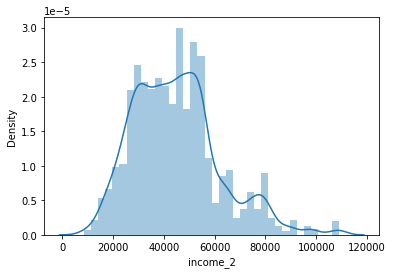

In [65]:
sns.distplot(data['income_2'])

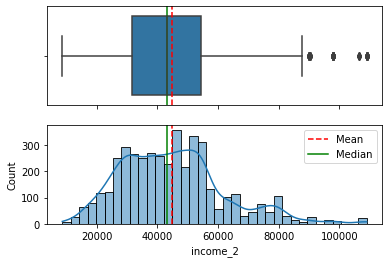

In [67]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns



f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
mean=data["income_2"].mean()
median=data["income_2"].median()


sns.boxplot(data=data, x="income_2", ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')


sns.histplot(data=data, x="income_2", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")


ax_hist.legend()

ax_box.set(xlabel='')
plt.show()

<AxesSubplot:xlabel='race', ylabel='count'>

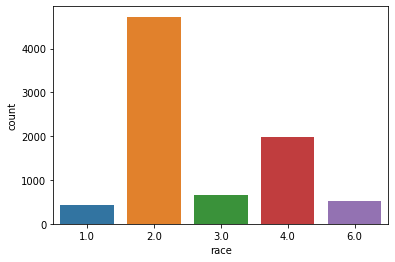

In [68]:
sns.countplot(x ='race', data = data)